# Intro

In [1]:
import matplotlib.pyplot as plt
plt.style.use("/home/thorben/Documents/thesis.mplstyle")
import numpy as np
import pandas as pd

In [2]:
def pts_to_inches(pts):
    inches_per_pt = 1/72.27
    return pts*inches_per_pt

RATIO = 1.33
TEXTWIDTH = pts_to_inches(430)
SAMPLE_STYLE = {"color": "r", "linestyle": "--"}
BG_STYLE = {"color": "k", "linestyle": "-"}
HIST_PARAMS = {"density": True, "histtype": "step"}

In [3]:
def plot_roc_curves(files, tags, colors, linestyles, xlabel, ylabel, figsize=(0.75 * TEXTWIDTH, (0.75 / RATIO) * TEXTWIDTH), plot_eq=True,):
    fig, ax = plt.subplots(constrained_layout=True, figsize=figsize)
    for f, t, c, l in zip(files, tags, colors, linestyles):
        data = np.load(f)
        ax.plot(data["tpr"], 1. / (data["fpr"] + 1e-8), linestyle=l, c=c, label=t)
        print(t)
        print(f"\tBackground rejection at e_S=0.3: {np.interp(0.3, data['tpr'], 1 / (data['fpr'] + 1e-8)):.2f}")
        print(f"\tAUC: {data['auc']:.4f}")

    if plot_eq:
        x = np.linspace(1e-8, 1, 1000)
        ax.plot(x, 1/x, c="grey", linestyle="--",)

    ax.set_yscale("log")
    ax.set_xticks(ticks=[0.1, 0.3, 0.5, 0.7, 0.9], minor=True)
    ax.grid(which="both")
    ax.set_ylim(1, 1e4)
    ax.set_xlim(0, 1)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    h, l = ax.get_legend_handles_labels()
    if any(h):
        ax.legend()
    return fig

# Figure 1
ROC curves top vs. QCD data; discrete vs. continuous

Original
	Background rejection at e_S=0.3: 1364.27
	AUC: 0.9847
Discrete
	Background rejection at e_S=0.3: 1269.88
	AUC: 0.9840


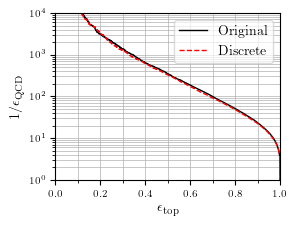

In [4]:
files = [
    "/home/thorben/Projects/Transformers/final_data/logs_particlenet/data_qcdVStop_raw_full/roc.npz",     
    "/home/thorben/Projects/Transformers/final_data/logs_particlenet/data_qcdVStop_discretized_full/roc.npz",     
    ]
tags = [
    "Original",
    "Discrete",
]
colors = ["k", "r"]
linestyles = ["-", "--"]
xlabel = r"$\epsilon_{\rm{top}}$"
ylabel = r"$1 / \epsilon_{\rm{QCD}}$"
figsize = (0.48 * TEXTWIDTH, 0.48 / RATIO * TEXTWIDTH)

fig = plot_roc_curves(files, tags, colors, linestyles, xlabel, ylabel, figsize, False)
fig.savefig("/home/thorben/Projects/Transformers/transformer-hep/figures/paper/roc_qcdVStop.pdf")

# Figure 2
Probabilities and multiplicity correlation

Random guessing with 617.9378690147303 bins
Random guessing with 754.6302713149851 bins


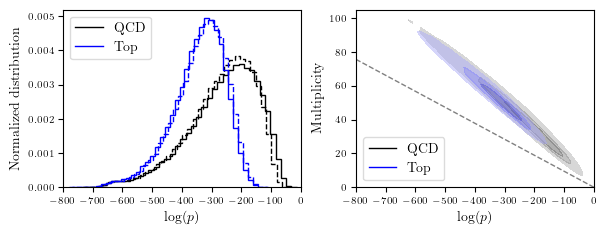

In [5]:
fig, axes = plt.subplots(1, 2, constrained_layout=True, figsize=(TEXTWIDTH, TEXTWIDTH / (2 * RATIO)))
import seaborn as sns

files = [
    "/home/thorben/Projects/Transformers/final_data/logs_transformer/qcd_final/qcd_hl8_hd256/results_qcd_test.npz",
    "/home/thorben/Projects/Transformers/final_data/logs_transformer/top_final/top_hl8_hd256/results_qcd_test.npz",
    "/home/thorben/Projects/Transformers/final_data/logs_transformer/qcd_final/qcd_hl8_hd256/results_top_test.npz",
    "/home/thorben/Projects/Transformers/final_data/logs_transformer/top_final/top_hl8_hd256/results_top_test.npz",
]
plot_labels = [
    "QCD",
    None,
    "Top",
    None,
]
colors = ["k", "k", "b", "b"]
linestyles = ["-", "--", "-", "--"]

np.random.seed(0)
for f, t, c, l in zip(files, plot_labels, colors, linestyles):
    dat = np.load(f)
    idcs = np.random.choice(len(dat["probs"]), 50000)
    axes[0].hist(dat["probs"], **HIST_PARAMS, color=c, linestyle=l, bins=40)
    axes[0].plot([], [], color=c, label=t, linestyle=l)
    if t in ["QCD", "Top"]:
        sns.kdeplot(x=dat["probs"][idcs], y=dat["n_const"][idcs], ax=axes[1], fill=True, alpha=0.5, color=c, levels=4)
        p = np.polyfit(x=dat["probs"][idcs], y=dat["n_const"][idcs], deg=1)
        print(f"Random guessing with {np.exp(-1 / p[0])} bins")
        axes[1].plot([], [], color=c, label=t.split()[-1])


axes[1].plot(np.log(1. / 39402) * np.linspace(0, 100, 100), np.linspace(0, 100, 100), linestyle="--", color="grey",)

axes[0].legend(loc="upper left")
axes[1].legend(loc="lower left")

axes[0].set_xlabel("$\log(p)$")
axes[0].set_ylabel("Normalized distribution")

axes[0].set_xlim(-800, 0)

axes[1].set_xlabel("$\log(p)$")
axes[1].set_ylabel("Multiplicity")

axes[1].set_ylim(0, 105)
axes[1].set_xlim(-800, 0)

fig.savefig("/home/thorben/Projects/Transformers/transformer-hep/figures/paper/density.pdf")

# Figure 3
Likelihood ratio classification

0.9539648954


/tmp/ipykernel_2143/926177005.py:30: RuntimeWarning: divide by zero encountered in divide
  axes[1].plot(roc_data["tpr"], 1 / roc_data["fpr"], c="k", label="ParticleNet")
/tmp/ipykernel_2143/926177005.py:31: RuntimeWarning: divide by zero encountered in divide
  axes[1].plot(tpr, 1 / fpr, label="Transformer", c="r")


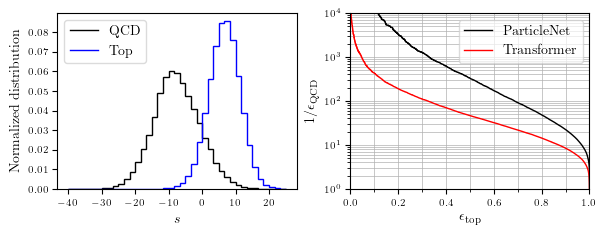

In [6]:
which = "test"
tQCD_dQCD = np.load(f"/home/thorben/Projects/Transformers/final_data/logs_transformer/qcd_final/qcd_hl8_hd256/results_qcd_{which}.npz")["probs"]
tQCD_dTop = np.load(f"/home/thorben/Projects/Transformers/final_data/logs_transformer/qcd_final/qcd_hl8_hd256/results_top_{which}.npz")["probs"]

tTop_dQCD = np.load(f"/home/thorben/Projects/Transformers/final_data/logs_transformer/top_final/top_hl8_hd256/results_qcd_{which}.npz")["probs"]
tTop_dTop = np.load(f"/home/thorben/Projects/Transformers/final_data/logs_transformer/top_final/top_hl8_hd256/results_top_{which}.npz")["probs"]

lr_top = tTop_dTop - tQCD_dTop
lr_QCD = tTop_dQCD - tQCD_dQCD


from sklearn.metrics import roc_curve, roc_auc_score
fpr, tpr, _ = roc_curve(np.append(np.zeros(len(lr_QCD)), np.ones(len(lr_top))), np.append(lr_QCD, lr_top))
print(roc_auc_score(np.append(np.zeros(len(lr_QCD)), np.ones(len(lr_top))), np.append(lr_QCD, lr_top)))
roc_data = np.load("/home/thorben/Projects/Transformers/final_data/logs_particlenet/data_qcdVStop_discretized_full/roc.npz")

fig, axes = plt.subplots(1, 2, constrained_layout=True, figsize=(TEXTWIDTH, TEXTWIDTH / (2 * RATIO)))
bins = np.linspace(-40, 25, 40)

axes[0].hist(lr_QCD, color="k", bins=bins, **HIST_PARAMS,)
axes[0].plot([], [], c="k", label="QCD")

axes[0].hist(lr_top, color="b", bins=bins, **HIST_PARAMS,)
axes[0].plot([], [], c="b", label="Top")

axes[0].legend(loc="upper left")
axes[0].set_ylabel("Normalized distribution")
axes[0].set_xlabel("$s$")

axes[1].plot(roc_data["tpr"], 1 / roc_data["fpr"], c="k", label="ParticleNet")
axes[1].plot(tpr, 1 / fpr, label="Transformer", c="r")

axes[1].set_xticks([0.1, 0.3, 0.5, 0.7, 0.9], minor=True)
axes[1].grid(which="both")
axes[1].set_yscale("log")
axes[1].set_ylim(1, 1e4)
axes[1].set_xlim(0, 1)
axes[1].legend()
axes[1].set_xlabel(r"$\epsilon_{\rm{top}}$")
axes[1].set_ylabel(r"$1 / \epsilon_{\rm{QCD}}$")

fig.savefig("/home/thorben/Projects/Transformers/transformer-hep/figures/paper/density_classification.pdf")

# Figure 4
Feature distribution

In [7]:
def make_continues(jets, mask, noise=False):
    pt_bins = np.load("/home/thorben/Projects/Transformers/final_data/preprocessing_bins/pt_bins_pt40_eta30_phi30_lower001.npy")
    eta_bins = np.load("/home/thorben/Projects/Transformers/final_data/preprocessing_bins/eta_bins_pt40_eta30_phi30_lower001.npy")
    phi_bins = np.load("/home/thorben/Projects/Transformers/final_data/preprocessing_bins/phi_bins_pt40_eta30_phi30_lower001.npy")

    pt_disc = jets[:, :, 0]
    eta_disc = jets[:, :, 1]
    phi_disc = jets[:, :, 2]

    if noise:
        pt_con = (pt_disc - np.random.uniform(0.0, 1.0, size=pt_disc.shape)) * (
            pt_bins[1] - pt_bins[0]
        ) + pt_bins[0]
        eta_con = (eta_disc - np.random.uniform(0.0, 1.0, size=eta_disc.shape)) * (
            eta_bins[1] - eta_bins[0]
        ) + eta_bins[0]
        phi_con = (phi_disc - np.random.uniform(0.0, 1.0, size=phi_disc.shape)) * (
            phi_bins[1] - phi_bins[0]
        ) + phi_bins[0]
    else:
        pt_con = (pt_disc - 0.5) * (pt_bins[1] - pt_bins[0]) + pt_bins[0]
        eta_con = (eta_disc - 0.5) * (eta_bins[1] - eta_bins[0]) + eta_bins[0]
        phi_con = (phi_disc - 0.5) * (phi_bins[1] - phi_bins[0]) + phi_bins[0]


    pt_con = np.exp(pt_con)
    pt_con[mask] = 0.0
    eta_con[mask] = 0.0
    phi_con[mask] = 0.0
    
    pxs = np.cos(phi_con) * pt_con
    pys = np.sin(phi_con) * pt_con
    pzs = np.sinh(eta_con) * pt_con
    es = (pxs ** 2 + pys ** 2 + pzs ** 2) ** (1. / 2)

    pxj = np.sum(pxs, -1)
    pyj = np.sum(pys, -1)
    pzj = np.sum(pzs, -1)
    ej = np.sum(es, -1)
    
    ptj = np.sqrt(pxj**2 + pyj**2)
    mj = (ej ** 2 - pxj ** 2 - pyj ** 2 - pzj ** 2) ** (1. / 2)

    continues_jets = np.stack((pt_con, eta_con, phi_con), -1)

    return continues_jets, ptj, mj

In [8]:
def get_files(which):
    if which == "":
        sample_files = [
            "/mnt/wsl/PHYSICALDRIVE1p1/thorben/Data/jet_datasets/top_benchmark/cluster/test_qcd_pt40_eta30_phi30_lower001.h5",
            "/home/thorben/Projects/Transformers/final_data/logs_transformer/qcd_final/qcd_hl8_hd256/samples_train_top5k_100.h5",
        ]
        tags = [
            "Data",
            "Samples",
            ]
        colors = {
            "Samples": "r",
            "Data": "k",
            }
    elif which == "_qcd":
        sample_files = [
            "/mnt/wsl/PHYSICALDRIVE1p1/thorben/Data/jet_datasets/top_benchmark/cluster/test_qcd_pt40_eta30_phi30_lower001.h5",
            "/home/thorben/Projects/Transformers/final_data/logs_transformer/qcd_final/qcd_hl8_hd256/samples_train_top5k_100.h5",
            "/home/thorben/Projects/Transformers/final_data/logs_transformer/qcd_final/qcd_hl8_hd256/samples_train_100.h5",
        ]
        tags = [
            "Data",
            "Top-k",
            "Full"
            ]
        colors = {
            "Top-k": "r",
            "Full": "b",
            "Data": "k",
            }
    elif which == "_top":
        sample_files = [
            "/mnt/wsl/PHYSICALDRIVE1p1/thorben/Data/jet_datasets/top_benchmark/cluster/test_top_pt40_eta30_phi30_lower001.h5",
            "/home/thorben/Projects/Transformers/final_data/logs_transformer/top_final/top_hl8_hd256/samples_train_top5k_100.h5",
            "/home/thorben/Projects/Transformers/final_data/logs_transformer/top_final/top_hl8_hd256/samples_train_100.h5",
        ]
        tags = [
            "Data",
            "Top-k",
            "Full"
            ]
        colors = {
            "Top-k": "r",
            "Full": "b",
            "Data": "k",
            }
    elif which == "_top_large":
        sample_files = [
            "/mnt/wsl/PHYSICALDRIVE1p1/thorben/Data/jet_datasets/top_benchmark/cluster/test_top_pt40_eta30_phi30_lower001.h5",
            "/home/thorben/Projects/Transformers/final_data/logs_transformer/top_final/top_hl8_hd256_nc100/samples_train_top5k_100.h5",
            "/home/thorben/Projects/Transformers/final_data/logs_transformer/top_final/top_hl8_hd256_nc100/samples_train_100.h5",
            "/home/thorben/Projects/Transformers/final_data/logs_transformer/top_final/top_large_1/samples_train_top5k_100.h5",
            "/home/thorben/Projects/Transformers/final_data/logs_transformer/top_final/top_large_1/samples_train_100.h5",
        ]
        tags = [
            "Data",
            "Top-k",
            "Full",
            "Top-k 1",
            "Full 1",
            ]
        colors = {
            "Top-k": "r",
            "Full": "b",
            "Top-k 1": "orange",
            "Full 1": "purple",
            "Data": "k",
            }
        
    jets = {}
    for f, t in zip(sample_files, tags):
        tmp = pd.read_hdf(f, key="discretized", stop=None)
        tmp = tmp.to_numpy()[:, :300].reshape(len(tmp), -1, 3)
        print(tmp.shape)
        mask = tmp[:, :, 0] == -1
        jets[t] = make_continues(tmp, mask)
    return jets, tags, colors

(201914, 100, 3)
(199998, 100, 3)
(201914, 100, 3)
(199998, 100, 3)
(200000, 100, 3)


/tmp/ipykernel_2143/2438391261.py:42: RuntimeWarning: invalid value encountered in sqrt
  mj = (ej ** 2 - pxj ** 2 - pyj ** 2 - pzj ** 2) ** (1. / 2)


(202086, 100, 3)
(200000, 100, 3)
(200000, 100, 3)


/tmp/ipykernel_2143/2438391261.py:42: RuntimeWarning: invalid value encountered in sqrt
  mj = (ej ** 2 - pxj ** 2 - pyj ** 2 - pzj ** 2) ** (1. / 2)


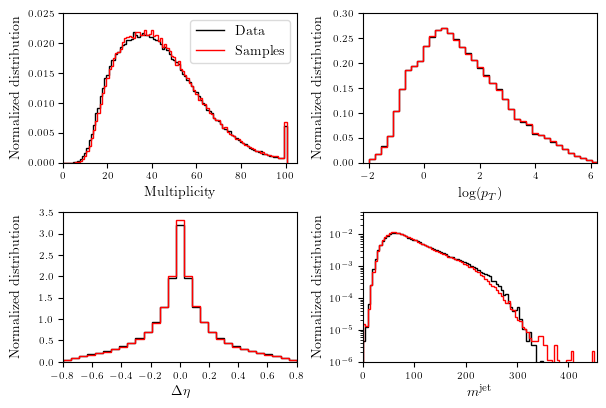

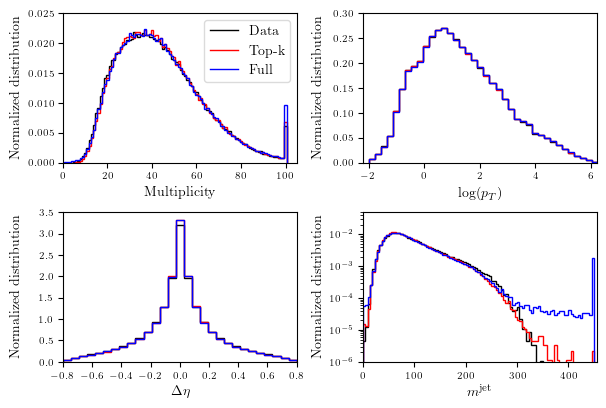

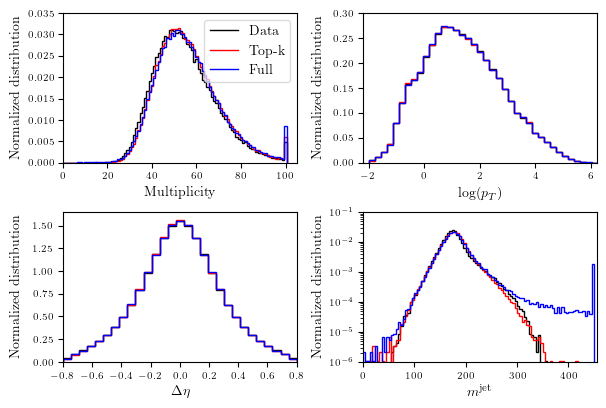

In [9]:
# QCD Main Plot "" top plot "_top" qcd appendix "_qcd"
for which in ["", "_qcd", "_top"]:
    jets, tags, colors = get_files(which)
    fig, axes = plt.subplots(2, 2, constrained_layout=True, figsize=(TEXTWIDTH, TEXTWIDTH * 2 / 3))

    pt_bins = np.load("/home/thorben/Projects/Transformers/final_data/preprocessing_bins/pt_bins_pt40_eta30_phi30_lower001.npy")
    eta_bins = np.linspace(-0.8, 0.8, 30)
    mj_bins = np.linspace(0, 450, 100)

    if which == "" or which == "_qcd":
        xlim = [(0, 105), (-2.2, 6.2), (-0.8, 0.8), (0, 455)]
        ylim = [(0, 0.025), (0, 0.3), (0, 3.5), (1e-6, 5e-2)]
    elif "top" in which:
        xlim = [(0, 105), (-2.2, 6.2), (-0.8, 0.8), (0, 455)]
        ylim = [(0, 0.035), (0, 0.3), (0, 1.65), (1e-6, 1e-1)]

    for t in jets:
        mask = jets[t][0][:, :, 0] != 0
        axes[0, 0].hist(np.sum(mask, axis=1), bins=np.linspace(-0.5, 100.5, 102), **HIST_PARAMS, color=colors[t],)
        axes[0, 0].plot([], [], color=colors[t], label=t)
        axes[0, 1].hist(np.log(jets[t][0][mask, 0].flatten()), bins=pt_bins, color=colors[t], **HIST_PARAMS)
        axes[1, 0].hist(jets[t][0][mask, 1].flatten(), bins=eta_bins, color=colors[t], **HIST_PARAMS)
        axes[1, 1].hist(np.clip(jets[t][2], mj_bins[0], mj_bins[-1]), bins=mj_bins, color=colors[t], **HIST_PARAMS)


    axes[0, 0].set_xlabel("Multiplicity")
    axes[0, 1].set_xlabel("$\log(p_T)$")
    axes[1, 0].set_xlabel("$\Delta \eta$")
    axes[1, 1].set_xlabel(r"$m^{\rm{jet}}$")

    axes[0, 0].set_ylabel("Normalized distribution")
    axes[0, 1].set_ylabel("Normalized distribution")
    axes[1, 0].set_ylabel("Normalized distribution")
    axes[1, 1].set_ylabel("Normalized distribution")

    axes[0, 0].legend()
    for i, ax in enumerate(axes.flatten()):
        ax.set_xlim(xlim[i])
        ax.set_ylim(ylim[i])


    axes[1, 1].set_yscale("log")
    fig.align_ylabels([axes[:, 0], axes[:, 1]])

    fig.savefig(f"/home/thorben/Projects/Transformers/transformer-hep/figures/paper/sample_features{which}.pdf");

# Figure 5
ROC Samples vs Data

None
	Background rejection at e_S=0.3: 5.39
	AUC: 0.6134
None
	Background rejection at e_S=0.3: 5.57
	AUC: 0.6160
None
	Background rejection at e_S=0.3: 5.72
	AUC: 0.6223
Top-k
	Background rejection at e_S=0.3: 5.39
	AUC: 0.6134
None
	Background rejection at e_S=0.3: 5.57
	AUC: 0.6160
None
	Background rejection at e_S=0.3: 5.72
	AUC: 0.6223
Full
	Background rejection at e_S=0.3: 6.12
	AUC: 0.6284
None
	Background rejection at e_S=0.3: 6.30
	AUC: 0.6334
None
	Background rejection at e_S=0.3: 6.50
	AUC: 0.6362
Top-k
	Background rejection at e_S=0.3: 7.58
	AUC: 0.6564
None
	Background rejection at e_S=0.3: 14.25
	AUC: 0.7348
None
	Background rejection at e_S=0.3: 10.84
	AUC: 0.7027
Full
	Background rejection at e_S=0.3: 39.57
	AUC: 0.8311
None
	Background rejection at e_S=0.3: 64.64
	AUC: 0.8558
None
	Background rejection at e_S=0.3: 41.96
	AUC: 0.8384


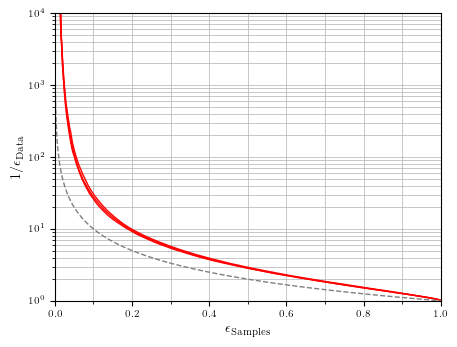

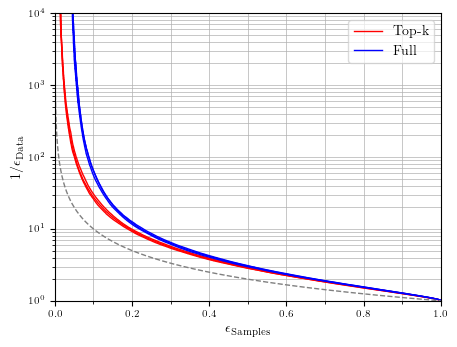

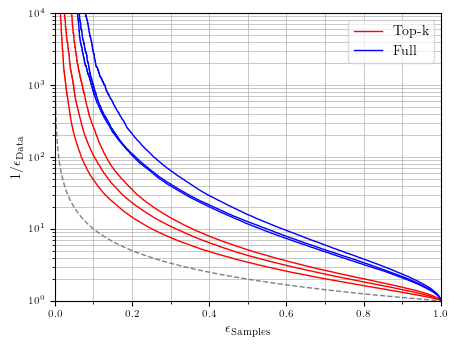

In [10]:
# "" main plot; "_top" main top plot, "_qcd" QCD appendix,"_top_full" alle tops
which = "_qcd"
for which in ["", "_qcd", "_top_full"]:
    if which == "":
        files = [
            "/home/thorben/Projects/Transformers/final_data/logs_particlenet/qcd_final/qcd_final_top5k_hl8_hd256/roc.npz",
            "/home/thorben/Projects/Transformers/final_data/logs_particlenet/qcd_final/qcd_final_top5k_hl8_hd256_1/roc.npz",
            "/home/thorben/Projects/Transformers/final_data/logs_particlenet/qcd_final/qcd_final_top5k_hl8_hd256_2/roc.npz",
        ]
        tags = [None] * 3
        colors = ["r"] * 3
        linestyles = ["-"] * 3
    elif which == "_qcd":
        files = [
            "/home/thorben/Projects/Transformers/final_data/logs_particlenet/qcd_final/qcd_final_top5k_hl8_hd256/roc.npz",
            "/home/thorben/Projects/Transformers/final_data/logs_particlenet/qcd_final/qcd_final_top5k_hl8_hd256_1/roc.npz",
            "/home/thorben/Projects/Transformers/final_data/logs_particlenet/qcd_final/qcd_final_top5k_hl8_hd256_2/roc.npz",
            "/home/thorben/Projects/Transformers/final_data/logs_particlenet/qcd_final/qcd_final_hl8_hd256/roc.npz",
            "/home/thorben/Projects/Transformers/final_data/logs_particlenet/qcd_final/qcd_final_hl8_hd256_1/roc.npz",
            "/home/thorben/Projects/Transformers/final_data/logs_particlenet/qcd_final/qcd_final_hl8_hd256_2/roc.npz",
        ]
        tags = [ "Top-k", None, None, "Full", None, None,]
        colors = ["r", "r", "r", "b", "b", "b",]
        linestyles = ["-", "-", "-", "-", "-", "-"]
    elif which == "_top_full":
        files = [
                "/home/thorben/Projects/Transformers/final_data/logs_particlenet/top_final/top_final_top5k_hl8_hd256/roc.npz",
                "/home/thorben/Projects/Transformers/final_data/logs_particlenet/top_final/top_final_top5k_hl8_hd256_3/roc.npz",
                "/home/thorben/Projects/Transformers/final_data/logs_particlenet/top_final/top_final_top5k_hl8_hd256_4/roc.npz",
                "/home/thorben/Projects/Transformers/final_data/logs_particlenet/top_final/top_final_hl8_hd256/roc.npz",
                "/home/thorben/Projects/Transformers/final_data/logs_particlenet/top_final/top_final_hl8_hd256_3/roc.npz",
                "/home/thorben/Projects/Transformers/final_data/logs_particlenet/top_final/top_final_hl8_hd256_4/roc.npz",
            ]
        tags = ["Top-k"] + [None] * 2 + ["Full"] + [None] * 2
        colors = ["r"] * 3 + ["b"] * 3
        linestyles = ["-"] * 6
    elif which == "_top_large":
        files = [
            "/home/thorben/Projects/Transformers/final_data/logs_particlenet/top_final/top_final_top5k_hl8_hd256_nc100/roc.npz",
            "/home/thorben/Projects/Transformers/final_data/logs_particlenet/top_final/top_final_hl8_hd256_nc100/roc.npz",
            "/home/thorben/Projects/Transformers/final_data/logs_particlenet/top_large/roc.npz",
            "/home/thorben/Projects/Transformers/final_data/logs_particlenet/top_large_1/roc.npz",
            "/home/thorben/Projects/Transformers/final_data/logs_particlenet/top_large_1_1/roc.npz",
            "/home/thorben/Projects/Transformers/final_data/logs_particlenet/top_large_1_2/roc.npz",
            "/home/thorben/Projects/Transformers/final_data/logs_particlenet/top_large_3/roc.npz",
            "/home/thorben/Projects/Transformers/final_data/logs_particlenet/top_large_3_1/roc.npz",
        ]
        tags = ["Top-k", "Full"] + [None] * 6
        colors = ["r", "b"] * 4
        linestyles = ["-"] * 8
    elif which == "_check_runs":
        files = [
            "/home/thorben/Projects/Transformers/final_data/logs_particlenet/check_runs/run_1/roc.npz",
            "/home/thorben/Projects/Transformers/final_data/logs_particlenet/check_runs/run_2/roc.npz",
            "/home/thorben/Projects/Transformers/final_data/logs_particlenet/check_runs/run_3/roc.npz",
        ]
        tags = [
            f"Run {i+1}" for i in range(3)
        ]
        linestyles = ["-"] * 3
        colors = ["r"] * 3

    elif which == "_check_runs_50":
        files = [
            "/home/thorben/Projects/Transformers/final_data/logs_particlenet/check_runs_50/run_1/roc.npz",
            "/home/thorben/Projects/Transformers/final_data/logs_particlenet/qcd_final/qcd_final_hl8_hd256/roc.npz",
            "/home/thorben/Projects/Transformers/final_data/logs_particlenet/qcd_final/qcd_final_hl8_hd256_1/roc.npz",
            "/home/thorben/Projects/Transformers/final_data/logs_particlenet/qcd_final/qcd_final_hl8_hd256_2/roc.npz",
            "/home/thorben/Projects/Transformers/final_data/logs_particlenet/check_runs_50/run_1_topk/roc.npz",
            "/home/thorben/Projects/Transformers/final_data/logs_particlenet/qcd_final/qcd_final_top5k_hl8_hd256/roc.npz",
            "/home/thorben/Projects/Transformers/final_data/logs_particlenet/qcd_final/qcd_final_top5k_hl8_hd256_1/roc.npz",
            "/home/thorben/Projects/Transformers/final_data/logs_particlenet/qcd_final/qcd_final_top5k_hl8_hd256_2/roc.npz",
        ]
        tags = ["Full",] + [None] * 3 + ["Top-k",] + [None] * 3
        linestyles = (["-"] + ["--"] * 3) * 2
        colors = ["b"] * 4 + ["r"] * 4

    elif which == "_check_runs_top":
        files = [
            "/home/thorben/Projects/Transformers/final_data/logs_particlenet/check_runs_top/run_1/roc.npz",
            "/home/thorben/Projects/Transformers/final_data/logs_particlenet/check_runs_top/run_2/roc.npz",
            "/home/thorben/Projects/Transformers/final_data/logs_particlenet/check_runs_top/run_3/roc.npz",
            "/home/thorben/Projects/Transformers/final_data/logs_particlenet/top_final/top_final_top5k_hl8_hd256/roc.npz",
            "/home/thorben/Projects/Transformers/final_data/logs_particlenet/top_final/top_final_hl8_hd256/roc.npz",
            "/home/thorben/Projects/Transformers/final_data/logs_particlenet/top_final/top_final_top5k_hl8_hd256_3/roc.npz",
            "/home/thorben/Projects/Transformers/final_data/logs_particlenet/top_final/top_final_top5k_hl8_hd256_4/roc.npz",
            "/home/thorben/Projects/Transformers/final_data/logs_particlenet/top_final/top_final_top5k_hl8_hd256_1/roc.npz",
            "/home/thorben/Projects/Transformers/final_data/logs_particlenet/top_final/top_final_top5k_hl8_hd256_2/roc.npz",
        ]
        tags = [f"Run {i+1}" for i in range(3)] + [f"orig {i + 1}" for i in range(3)]
        colors = ["r", "purple", "grey"] + ["k"] + ["orange"] + ["green"] * 2
        linestyles = ["-"] * 6

    xlabel = r"$\epsilon_{\rm{Samples}}$"
    ylabel = r"$1 / \epsilon_{\rm{Data}}$"
    figsize = (0.75 * TEXTWIDTH, 0.75 / RATIO * TEXTWIDTH)

    fig = plot_roc_curves(files, tags, colors, linestyles, xlabel, ylabel, figsize, True)
    fig.savefig(f"/home/thorben/Projects/Transformers/transformer-hep/figures/paper/roc_samples_pnet{which}.pdf")

# Figure 6
Number of particles per constituent position

In [11]:
from preprocess import preprocess_dataframe
data = pd.read_hdf("/mnt/wsl/PHYSICALDRIVE1p1/thorben/Data/jet_datasets/top_benchmark/cluster/train_qcd_pt40_eta30_phi30_lower001.h5", key="discretized", stop=600000)

_, _, bg_bins = preprocess_dataframe(
    data, 3, (41, 31, 31), 100, False, False,False, False, False,
)
nonZ = []
for i in range(100):
    tmp_bins = np.zeros(39402)
    for j in bg_bins:
        tmp_bins[j[i]] += 1
    nonZ.append(np.count_nonzero(tmp_bins))

/home/thorben/anaconda3/envs/torch_env/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Shapes: x.shape=(600000, 100, 3) padding_mask.shape=(600000, 100) bins.shape=(600000, 100)


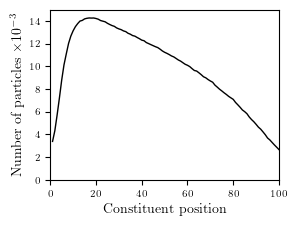

In [12]:
fig, axes = plt.subplots(constrained_layout=True, figsize=(TEXTWIDTH * 0.48, TEXTWIDTH * 0.48 / RATIO ))
axes.plot(np.arange(1, 100.5, 1), [i / 1000. for i in nonZ], color="k")
axes.set_xlabel("Constituent position")
axes.set_ylabel(r"Number of particles $\times 10^{-3}$")
axes.set_xlim(0, 100)
axes.set_ylim(0, 15)
fig.savefig("/home/thorben/Projects/Transformers/transformer-hep/figures/paper/bin_population.pdf");